In [4]:
# Biblioteca de modelagem de dados
import pandas as pd

# Biblioteca para recursos matemáricos
import numpy as np

# Biblioteca de pltagem de dados graficos
import seaborn as sns
import matplotlib.pyplot as plt

# Biblioteca/Função para ignorar avisos
from warnings import filterwarnings

In [5]:
# PLan 1 - dados de treino e teste
# Plan 2 - dados 'reais'

base_dados = pd.read_excel('BaseDados_FlorestaDeDecisão.xlsx', )

In [6]:
# 1 = Não usou
# 2 = Serviço
# 3 = Furto

base_dados.head(5)

,Id Cliente,Idade,Preço Seguro,CEP,Serviço
0,1,69,3930,19005,3
1,2,27,3336,19027,1
2,3,49,3936,19001,3
3,4,60,157,19009,1
4,5,51,3998,19050,2


In [7]:
base_dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   Id Cliente    500 non-null    int64
 1   Idade         500 non-null    int64
 2   Preço Seguro  500 non-null    int64
 3   CEP           500 non-null    int64
 4   Serviço       500 non-null    int64
dtypes: int64(5)
memory usage: 19.7 KB


In [8]:
# Descrição da base

base_dados.describe()

,Id Cliente,Idade,Preço Seguro,CEP,Serviço
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,250.500000,49.550000,1939.268000,19024.812000,1.904000
std,144.481833,18.167984,1402.289601,15.079105,0.858054
min,1.000000,18.000000,100.000000,19000.000000,1.000000
25%,125.750000,33.750000,612.000000,19011.000000,1.000000
50%,250.500000,51.000000,1667.500000,19025.000000,2.000000
75%,375.250000,65.000000,3329.500000,19038.000000,3.000000
max,500.000000,80.000000,3998.000000,19050.000000,3.000000


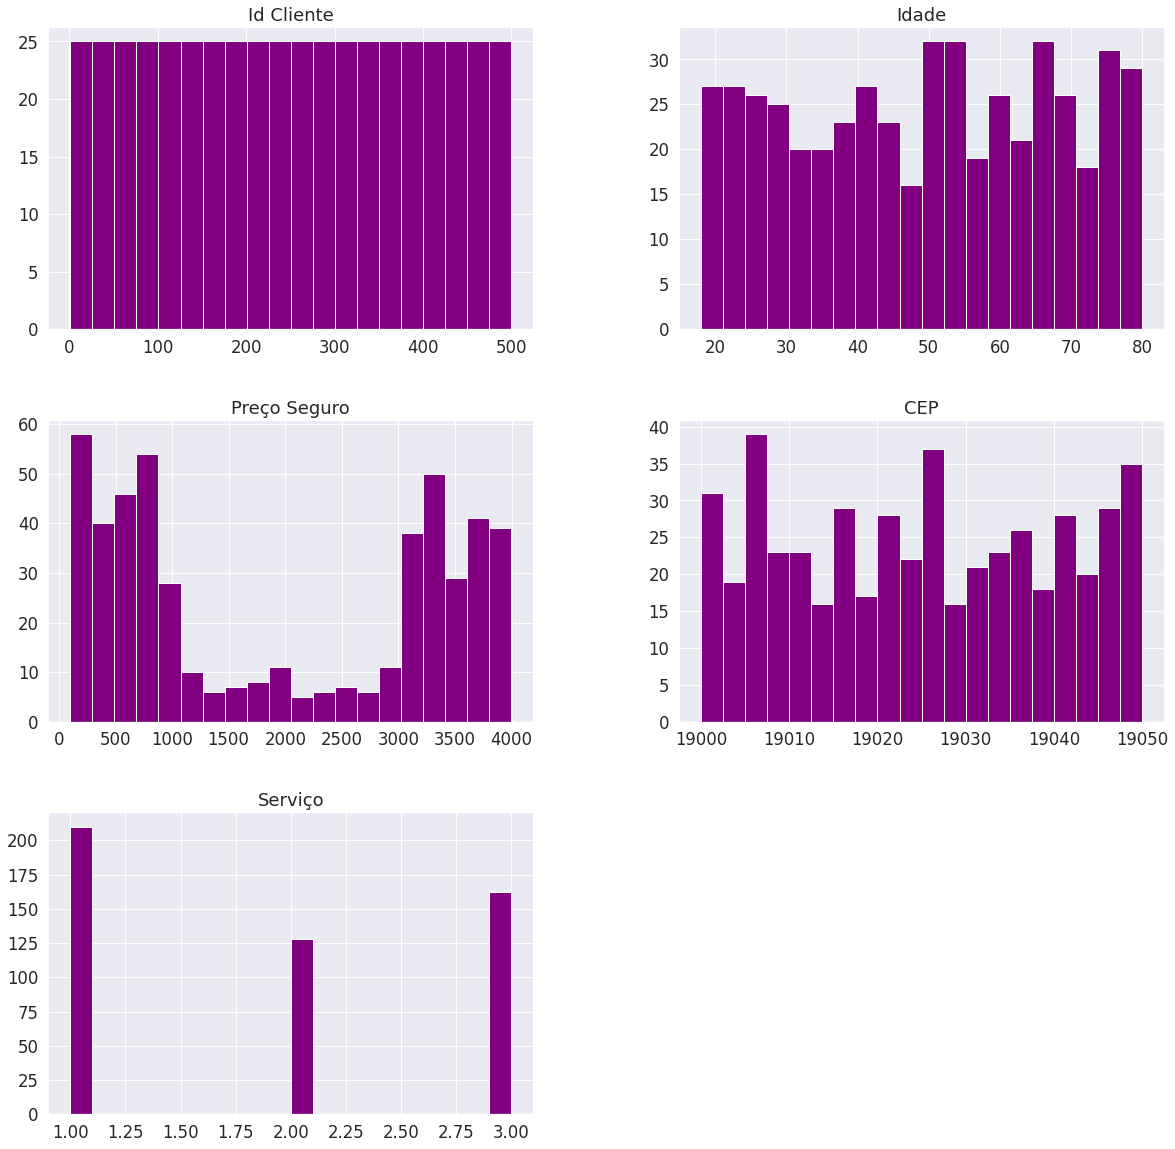

In [9]:
# Explorando os dados

sns.set(font_scale=1.5, rc={'figure.figsize':(20,20)})
eixo = base_dados.hist(bins=20,color='purple')

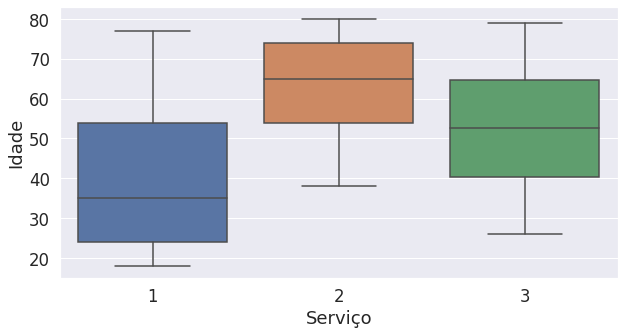

In [11]:
# Explorando dados

plt.figure(figsize=(10,5))
sns.boxplot(data=base_dados, x='Serviço', y='Idade');

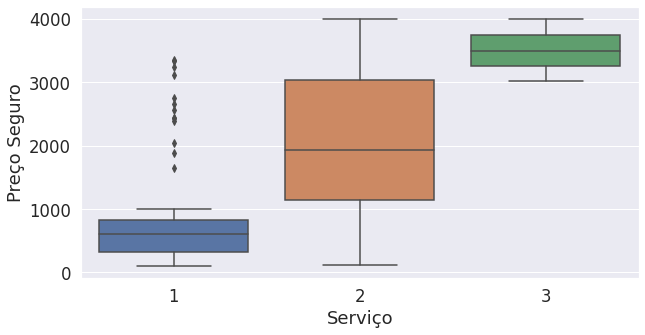

In [12]:
# explorando dados

plt.figure(figsize=(10,5))
sns.boxplot(data=base_dados, x='Serviço', y='Preço Seguro');

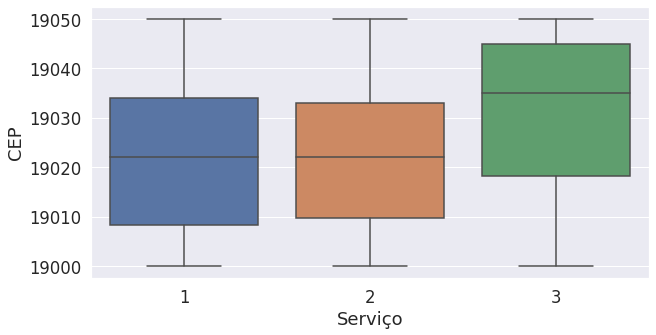

In [14]:
plt.figure(figsize=(10,5))
sns.boxplot(data=base_dados, x='Serviço', y='CEP');

In [16]:
# Fatiando as colunas para o teste

caracteristicas = base_dados.iloc[:,1:4].values
previsor = base_dados.iloc[:,4:5].values

In [17]:
# importando a biblioteca para treino

from sklearn.model_selection import train_test_split

In [18]:
# Treianando o modelo

x_treinamento, x_teste, y_treinamento, y_teste = train_test_split(
    caracteristicas,
    previsor,
    test_size=0.30,
    random_state=10
)

print(len(base_dados))
print(len(x_treinamento))
print(len(x_teste))

500
350
150


In [20]:
# Verificando a acuracia do modelo

from sklearn.ensemble import RandomForestClassifier

random_forrest = RandomForestClassifier(n_estimators=500, verbose=1)

In [21]:
random_forrest.fit(x_treinamento,y_treinamento)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """Entry point for launching an IPython kernel.
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:    0.5s finished


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=500,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=1, warm_start=False)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:    0.1s finished


[[60  3  1]
 [ 6 22  8]
 [ 1  1 48]]


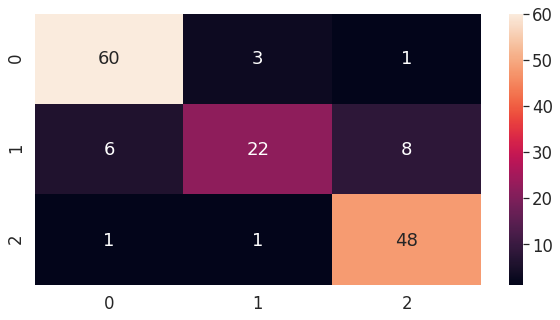

In [25]:
# Usando o restante dos dados da Plan1 para realizar o teste
previsoes = random_forrest.predict(x_teste)

#Gerando a matriz de confusão para teste do modelo
from sklearn.metrics import confusion_matrix
matriz_confusao = confusion_matrix(y_teste, previsoes)
print(matriz_confusao)

# Visualizando resultado do teste de precisão do modelo
plt.figure(figsize=(10,5))
sns.heatmap(matriz_confusao, annot=True);

In [26]:
# Resultado da precisão do modelo

from sklearn.metrics import classification_report

report = classification_report(y_teste, previsoes)
print(report)

              precision    recall  f1-score   support

           1       0.90      0.94      0.92        64
           2       0.85      0.61      0.71        36
           3       0.84      0.96      0.90        50

    accuracy                           0.87       150
   macro avg       0.86      0.84      0.84       150
weighted avg       0.87      0.87      0.86       150



In [27]:
#Importando a base para teste do modelo em "produção"

novas_vendas = pd.read_excel('BaseDados_FlorestaDeDecisão.xlsx','Plan2')
novas_vendas.head()

,Id Cliente,Idade,Preço Seguro,CEP
0,1001,25,801,19001
1,1002,27,1090,19027
2,1003,45,364,19030
3,1004,30,2428,19014
4,1005,32,891,19020


In [28]:
# Realizando a predição com os novos dados e criando uma coluna para plotar o resultado

prever = novas_vendas.iloc[:,1:4].values

novas_vendas['Previsao do Modelo'] = random_forrest.predict(prever)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:    0.1s finished


In [33]:
#Resultado da predição

novas_vendas['Previsao do Modelo'].value_counts()

1    15
2     5
3     1
Name: Previsao do Modelo, dtype: int64

In [29]:
# Detalhe da predição

novas_vendas

,Id Cliente,Idade,Preço Seguro,CEP,Previsao do Modelo
0,1001,25,801,19001,1
1,1002,27,1090,19027,1
2,1003,45,364,19030,1
3,1004,30,2428,19014,1
4,1005,32,891,19020,1
5,1006,36,823,19025,1
6,1007,44,3895,19032,3
7,1008,36,457,19023,1
8,1009,40,427,19008,1
9,1010,40,928,19009,1
